In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os

In [3]:
data = pd.DataFrame(columns=['ID', 'subject','age','region','sample','test','lm11','lm22','sigma11 (MPa)','sigma22 (MPa)'])
data_numeric = pd.DataFrame(columns=['ID', 'subject','age','region','sample','test','lm11','lm22','sigma11 (MPa)','sigma22 (MPa)'])
subjects = [111,112,113,143,144,201,202,203,204,205]
ages     = ['Young', 'Aged']
regions  = ['Dorsal', 'Ventral']
samples  = np.arange(1,10)
tests    = ['OffbiaxialX', 'OffbiaxialY', 'Equibiaxial']

ID = 0
for i, subject in enumerate(subjects):
    for j, age in enumerate(ages):
        for k, region in enumerate(regions):
            i_sample = 0
            for l, sample in enumerate(samples):
                foldername = 'Subject'+str(subject)+'_Sample'+str(sample)+'_'+age+region
                if os.path.exists(foldername):
                    ID += 1
                    i_sample+=1
                for m, test in enumerate(tests):
                    filename   = foldername + '_' + test + '.csv'
                    path = foldername + '/' + filename
                    
                    if os.path.isfile(path):
                        testdata = pd.read_csv(path)
                        testdata = testdata.rename(columns={"Lambda11(-)": "lm11", "Lambda22(-)": "lm22", "Sigma11(MPa)": "sigma11 (MPa)", "Sigma22(MPa)": "sigma22 (MPa)"})
                        testdata['ID'] = ID
                        testdata['subject'] = subject
                        testdata['age'] = age
                        testdata['region'] = region
                        testdata['sample'] = sample
                        testdata['test'] = test
                        data = pd.concat([data,testdata])


                        testdata['ID'] = ID # There is a unique ID for every region of every sample of every subject
                        testdata['subject'] = i # subject ∈ {0,1,...,9} ~ {111,112,...,205}
                        testdata['age'] = j # age ∈ {0,1} ~ {Young, Aged}
                        testdata['region'] = k # region ∈ {0,1} ~ {Dorsal, Ventral}
                        testdata['sample'] = i_sample # sample ∈ {1,...,9}
                        testdata['test'] = m # test ∈ {0,1,2} ~ {Offx, Offy, Equi}
                        data_numeric = pd.concat([data_numeric,testdata])

data.to_csv('allmurinedata.csv', index=False)
data_numeric.to_csv('allmurinedata_numeric.csv', index=False)

In [4]:
data

,ID,subject,age,region,sample,test,lm11,lm22,sigma11 (MPa),sigma22 (MPa)
0,1,111,Young,Dorsal,1,OffbiaxialX,1.000000,1.000000,0.000000,0.000000
1,1,111,Young,Dorsal,1,OffbiaxialX,1.183634,1.115560,0.003113,0.001935
2,1,111,Young,Dorsal,1,OffbiaxialX,1.184479,1.114997,0.003227,0.001936
3,1,111,Young,Dorsal,1,OffbiaxialX,1.184847,1.115179,0.003265,0.001937
4,1,111,Young,Dorsal,1,OffbiaxialX,1.184965,1.115454,0.003260,0.001897
...,...,...,...,...,...,...,...,...,...,...
57,37,205,Aged,Ventral,6,Equibiaxial,1.346892,1.565934,0.018364,0.014120
58,37,205,Aged,Ventral,6,Equibiaxial,1.350935,1.570555,0.018754,0.014258
59,37,205,Aged,Ventral,6,Equibiaxial,1.357328,1.576434,0.019291,0.014420
60,37,205,Aged,Ventral,6,Equibiaxial,1.362611,1.584019,0.019672,0.014534


In [5]:
data_numeric

,ID,subject,age,region,sample,test,lm11,lm22,sigma11 (MPa),sigma22 (MPa)
0,1,0,0,0,1,0,1.000000,1.000000,0.000000,0.000000
1,1,0,0,0,1,0,1.183634,1.115560,0.003113,0.001935
2,1,0,0,0,1,0,1.184479,1.114997,0.003227,0.001936
3,1,0,0,0,1,0,1.184847,1.115179,0.003265,0.001937
4,1,0,0,0,1,0,1.184965,1.115454,0.003260,0.001897
...,...,...,...,...,...,...,...,...,...,...
57,37,9,1,1,2,2,1.346892,1.565934,0.018364,0.014120
58,37,9,1,1,2,2,1.350935,1.570555,0.018754,0.014258
59,37,9,1,1,2,2,1.357328,1.576434,0.019291,0.014420
60,37,9,1,1,2,2,1.362611,1.584019,0.019672,0.014534


In [5]:
murine_data = pd.read_csv('allmurinedata_numeric.csv')
# remove repetitive samples from the same region of a subject
murine_data = murine_data[murine_data['sample']==1]

# # Trim the first point of each curve where lm1,lm2=(1,1)
murine_data = murine_data[murine_data['lm11'] > 1.0]
murine_data = murine_data[murine_data['lm22'] > 1.0]

# # Reduce the data. Only keep one fourth of the points
# murine_data = murine_data[::4]

# shift the initial point of the stretches to (1,1)
for ID in np.unique(murine_data['ID']):
    for test in [0,1,2]:
        cond = (murine_data['ID']==ID) & (murine_data['test']==test)
        delta1 = murine_data['lm11'][cond].to_numpy()[0] - 1.0
        delta2 = murine_data['lm22'][cond].to_numpy()[0] - 1.0

        murine_data.loc[cond, 'lm11'] = murine_data['lm11'][cond] - delta1
        murine_data.loc[cond, 'lm22'] = murine_data['lm22'][cond] - delta2

        delta3 = murine_data['sigma11 (MPa)'][cond].to_numpy()[0] 
        delta4 = murine_data['sigma22 (MPa)'][cond].to_numpy()[0]

        murine_data.loc[cond, 'sigma11 (MPa)'] = murine_data['sigma11 (MPa)'][cond] - delta3
        murine_data.loc[cond, 'sigma22 (MPa)'] = murine_data['sigma22 (MPa)'][cond] - delta4

# Reassign ID so that there are no gaps
cur_ids = np.unique(murine_data['ID'])
new_ids = np.arange(len(cur_ids))
for i, ID in enumerate(cur_ids):
    murine_data.loc[murine_data['ID']==ID, 'ID'] = new_ids[i]
J = np.max(np.unique(murine_data.ID))
murine_data.to_csv('murine_data.csv', index=False)
murine_data

,ID,subject,age,region,sample,test,lm11,lm22,sigma11 (MPa),sigma22 (MPa)
1,0,0,0,0,1,0,1.000000,1.000000,0.000000,0.000000e+00
2,0,0,0,0,1,0,1.000845,0.999437,0.000114,1.000000e-06
3,0,0,0,0,1,0,1.001213,0.999619,0.000152,2.000000e-06
4,0,0,0,0,1,0,1.001331,0.999894,0.000147,-3.800000e-05
5,0,0,0,0,1,0,1.001555,1.000154,0.000176,-3.400000e-05
...,...,...,...,...,...,...,...,...,...,...
15577,15,9,1,1,1,2,1.195880,1.306829,0.011327,8.167000e-03
15578,15,9,1,1,1,2,1.201219,1.314198,0.011613,8.288000e-03
15579,15,9,1,1,1,2,1.206527,1.322457,0.011903,8.508000e-03
15580,15,9,1,1,1,2,1.211512,1.327753,0.012253,8.688000e-03


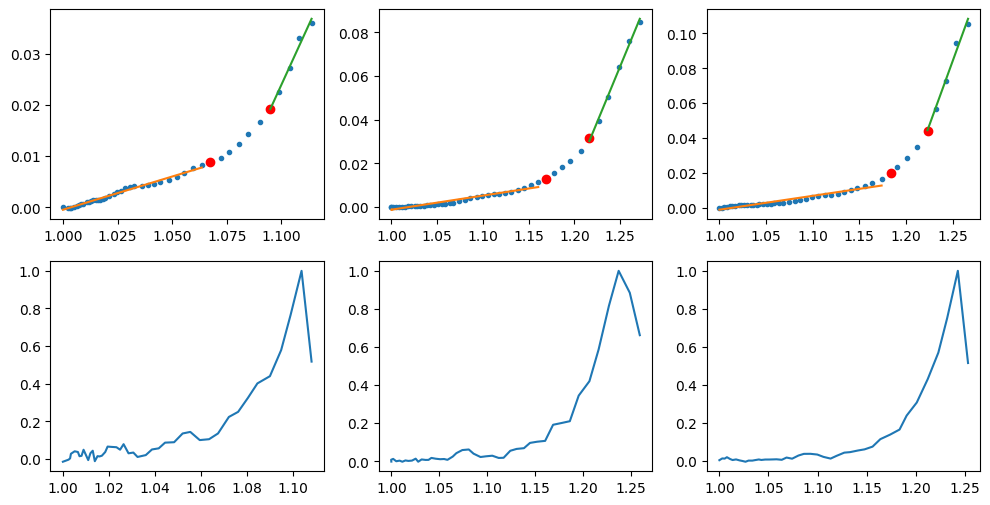

In [7]:
fig, ax = plt.subplots(2,3,figsize=(12,6))

i=1
specimen_data = murine_data[murine_data['ID']==i]
offx_data = specimen_data[specimen_data['test']==0]
offy_data = specimen_data[specimen_data['test']==1]
equi_data = specimen_data[specimen_data['test']==2]
ax[0,0].plot(offx_data['lm11'], offx_data['sigma11 (MPa)'], '.')
ax[0,1].plot(offy_data['lm11'], offy_data['sigma11 (MPa)'], '.')
ax[0,2].plot(equi_data['lm11'], equi_data['sigma11 (MPa)'], '.')

# plot the change
lim1 = 0.2
lim2 = 0.5

dsgmx = np.diff(offx_data['sigma11 (MPa)'])
n = 3
dsgmx = dsgmx/np.max(dsgmx)
ax[1,0].plot(offx_data['lm11'][:-1], dsgmx)
i1 = np.max(np.where(dsgmx<lim1))
ax[0,0].plot(offx_data['lm11'].to_numpy()[i1], offx_data['sigma11 (MPa)'].to_numpy()[i1], 'ro')
i2 = np.min(np.where(dsgmx>lim2))
ax[0,0].plot(offx_data['lm11'].to_numpy()[i2], offx_data['sigma11 (MPa)'].to_numpy()[i2], 'ro')

p = np.polyfit(offx_data['lm11'][:i1], offx_data['sigma11 (MPa)'][:i1], deg=1)
ax[0,0].plot(offx_data['lm11'][:i1], np.polyval(p, offx_data['lm11'][:i1]))
p = np.polyfit(offx_data['lm11'][i2:], offx_data['sigma11 (MPa)'][i2:], deg=1)
ax[0,0].plot(offx_data['lm11'][i2:], np.polyval(p, offx_data['lm11'][i2:]))

dsgmx = np.diff(offy_data['sigma11 (MPa)'])
dsgmx = dsgmx/np.max(dsgmx)
ax[1,1].plot(offy_data['lm11'][:-1], dsgmx)
i1 = np.max(np.where(dsgmx<lim1))
ax[0,1].plot(offy_data['lm11'].to_numpy()[i1], offy_data['sigma11 (MPa)'].to_numpy()[i1], 'ro')
i2 = np.min(np.where(dsgmx>lim2))
ax[0,1].plot(offy_data['lm11'].to_numpy()[i2], offy_data['sigma11 (MPa)'].to_numpy()[i2], 'ro')

p = np.polyfit(offy_data['lm11'][:i1], offy_data['sigma11 (MPa)'][:i1], deg=1)
ax[0,1].plot(offy_data['lm11'][:i1], np.polyval(p, offy_data['lm11'][:i1]))
p = np.polyfit(offy_data['lm11'][i2:], offy_data['sigma11 (MPa)'][i2:], deg=1)
ax[0,1].plot(offy_data['lm11'][i2:], np.polyval(p, offy_data['lm11'][i2:]))

dsgmx = np.diff(equi_data['sigma11 (MPa)'])
dsgmx = dsgmx/np.max(dsgmx)
ax[1,2].plot(equi_data['lm11'][:-1], dsgmx)
i1 = np.max(np.where(dsgmx<lim1))
ax[0,2].plot(equi_data['lm11'].to_numpy()[i1], equi_data['sigma11 (MPa)'].to_numpy()[i1], 'ro')
i2 = np.min(np.where(dsgmx>lim2))
ax[0,2].plot(equi_data['lm11'].to_numpy()[i2], equi_data['sigma11 (MPa)'].to_numpy()[i2], 'ro')

p = np.polyfit(equi_data['lm11'][:i1], equi_data['sigma11 (MPa)'][:i1], deg=1)
ax[0,2].plot(equi_data['lm11'][:i1], np.polyval(p, equi_data['lm11'][:i1]))
p = np.polyfit(equi_data['lm11'][i2:], equi_data['sigma11 (MPa)'][i2:], deg=1)
ax[0,2].plot(equi_data['lm11'][i2:], np.polyval(p, equi_data['lm11'][i2:]))


In [8]:
n = 3

lim1 = 0.2
lim2 = 0.9

for i in np.unique(murine_data['ID']):
    specimen_data = murine_data[murine_data['ID']==i]

    for t in [0,1,2]:
        data = specimen_data[specimen_data['test']==t]
        lmbx = data['lm11']
        lmby = data['lm22']
        sgmx = data['sigma11 (MPa)']
        sgmy = data['sigma11 (MPa)']
        
        dsgmx = np.diff(sgmx)
        dsgmx = dsgmx/np.max(dsgmx)
        dsgmy = np.diff(sgmy)
        dsgmy = dsgmy/np.max(dsgmy)
        
        i1_x = np.max(np.where(dsgmx<lim1))
        i2_x = np.min(np.where(dsgmx>lim2))
        i1_y = np.max(np.where(dsgmy<lim1))
        i2_y = np.min(np.where(dsgmy>lim2))

        calf_stiff_x = np.polyfit(lmbx[:i1_x+1], sgmx[:i1_x+1], deg=1)[0]
        calf_stiff_y = np.polyfit(lmby[:i1_y+1], sgmy[:i1_y+1], deg=1)[0]

        toe_stiff_x = np.polyfit(lmbx[i2_x:], sgmx[i2_x:], deg=1)[0]
        toe_stiff_y = np.polyfit(lmby[i2_y:], sgmy[i2_y:], deg=1)[0]
        
        i_trans_x = int(0.5*(i1_x + i2_x))
        i_trans_y = int(0.5*(i1_y + i2_y))

        trans_lmx = lmbx.to_numpy()[i_trans_x]
        trans_lmy = lmby.to_numpy()[i_trans_y]

        murine_data.loc[data.index, 'calf_stiff_x'] = calf_stiff_x
        murine_data.loc[data.index, 'calf_stiff_y'] = calf_stiff_y
        murine_data.loc[data.index, 'toe_stiff_x'] = toe_stiff_x
        murine_data.loc[data.index, 'toe_stiff_y'] = toe_stiff_y
        murine_data.loc[data.index, 'trans_lmx'] = trans_lmx
        murine_data.loc[data.index, 'trans_lmy'] = trans_lmy


In [9]:
murine_data

,ID,subject,age,region,sample,test,lm11,lm22,sigma11 (MPa),sigma22 (MPa),calf_stiff_x,calf_stiff_y,toe_stiff_x,toe_stiff_y,trans_lmx,trans_lmy
1,0,0,0,0,1,0,1.000000,1.000000,0.000000,0.000000,0.067382,0.030991,0.387948,0.202670,1.097193,1.212409
5,0,0,0,0,1,0,1.001555,1.000154,0.000176,-0.000034,0.067382,0.030991,0.387948,0.202670,1.097193,1.212409
9,0,0,0,0,1,0,1.002303,1.002119,0.000386,0.000249,0.067382,0.030991,0.387948,0.202670,1.097193,1.212409
13,0,0,0,0,1,0,1.004755,1.005239,0.000653,0.000470,0.067382,0.030991,0.387948,0.202670,1.097193,1.212409
17,0,0,0,0,1,0,1.006052,1.006403,0.000948,0.000692,0.067382,0.030991,0.387948,0.202670,1.097193,1.212409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15563,15,9,1,1,1,2,1.129000,1.217581,0.006438,0.004536,0.027846,0.030300,0.071399,0.049141,1.065521,1.122735
15567,15,9,1,1,1,2,1.145057,1.237756,0.007636,0.005626,0.027846,0.030300,0.071399,0.049141,1.065521,1.122735
15571,15,9,1,1,1,2,1.161492,1.263989,0.009092,0.006783,0.027846,0.030300,0.071399,0.049141,1.065521,1.122735
15575,15,9,1,1,1,2,1.181032,1.294549,0.010836,0.007878,0.027846,0.030300,0.071399,0.049141,1.065521,1.122735


In [10]:
murine_data.to_csv('murine_data_clean.csv', index=False)